In [484]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

# Load the data
df = pd.read_csv("train.csv")

#drop column passengerId name 
df = df.drop(['Name'], axis=1)

#seperate the cabin column into deck
df['Deck'] = df['Cabin'].str[0]
df['Side'] = df['Cabin'].str[-1]

#drop the cabin column
df = df.drop(['Cabin'], axis=1)

#convert all values to numeric 
df['Destination'] = df['Destination'].astype('category')
df['Destination'] = df['Destination'].cat.codes
df['HomePlanet'] = df['HomePlanet'].astype('category')
df['HomePlanet'] = df['HomePlanet'].cat.codes
df['CryoSleep'] = df['CryoSleep'].astype('category')
df['CryoSleep'] = df['CryoSleep'].cat.codes
df['VIP'] = df['VIP'].astype('category')
df['VIP'] = df['VIP'].cat.codes
df['Deck'] = df['Deck'].astype('category')
df['Deck'] = df['Deck'].cat.codes
df['Side'] = df['Side'].astype('category')
df['Side'] = df['Side'].cat.codes

#fill the Age column with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df['Age'] = imputer.fit_transform(df[['Age']])
#fill the RoomService coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df['RoomService'] = imputer.fit_transform(df[['RoomService']])
#fill the ShoppingMall coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df['ShoppingMall'] = imputer.fit_transform(df[['ShoppingMall']])
#fill the FoodCourt coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df['FoodCourt'] = imputer.fit_transform(df[['FoodCourt']])
#fill the Spa coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df['Spa'] = imputer.fit_transform(df[['Spa']])
#fill the VRDeck coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df['VRDeck'] = imputer.fit_transform(df[['VRDeck']])

#make a new coloum expenses by adding all the expenses
df['Expenses'] = df['RoomService'] + df['ShoppingMall'] + df['FoodCourt'] + df['Spa'] + df['VRDeck']

#only 2 digits after the decimal point
df['Expenses'] = df['Expenses'].round(decimals=2)   
df['Spa'] = df['Spa'].round(decimals=2)   

df.sample(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Expenses
2138,2295_02,0,0,2,37.0,0,0.000000,8.0,70.0,360.0,258.0,False,5,0,696.00
3462,3728_01,0,1,1,16.0,0,0.000000,0.0,0.0,0.0,0.0,True,6,1,0.00
2451,2628_02,1,0,0,51.0,0,0.000000,6.0,0.0,2085.0,67.0,False,0,0,2158.00
5600,5960_02,1,0,2,29.0,0,3215.000000,1211.0,4.0,7.0,417.0,True,2,1,4854.00
35,0031_03,2,0,2,20.0,0,224.687617,0.0,1750.0,990.0,0.0,True,5,0,2964.69
8610,9190_01,0,0,2,21.0,0,802.000000,0.0,1.0,1.0,0.0,True,5,1,804.00
8021,8585_01,2,0,2,50.0,0,748.000000,164.0,269.0,0.0,0.0,False,3,1,1181.00
1094,1161_01,1,0,0,28.0,0,0.000000,11330.0,72.0,43.0,461.0,True,1,1,11906.00
2505,2692_01,0,0,2,24.0,0,0.000000,0.0,21.0,0.0,695.0,False,-1,-1,716.00
3430,3699_04,1,0,2,57.0,0,0.000000,3859.0,13.0,195.0,3874.0,False,2,0,7941.00


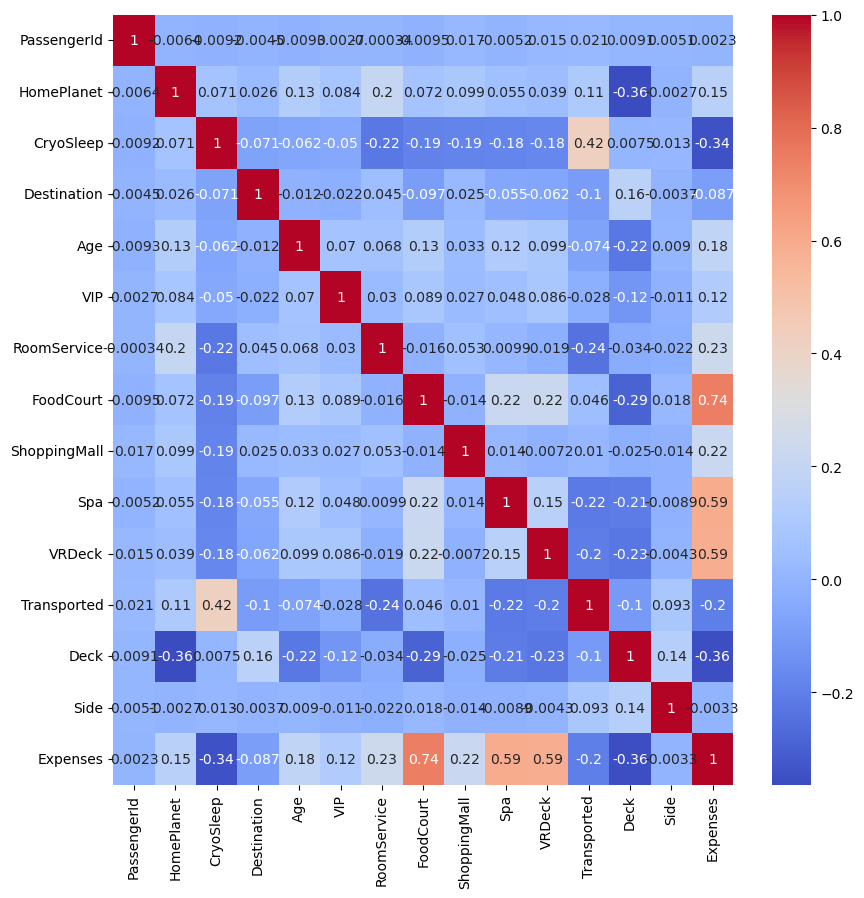

In [453]:
#make a heatmap to see the correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### KNN Model

In [490]:
#make a knn model and give the accuracy score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('Transported', axis=1)
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
KNN = ('Accuracy score: ', accuracy_score(y_test, y_pred))
print(KNN)

('Accuracy score: ', 0.6633435582822086)


### Decision Tree

In [455]:
#make a decision tree model and give the accuracy score with train test split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('Transported', axis=1)
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
#print number of leaves
print('Number of leaves: ', dt.get_n_leaves())
Descision_Tree = ('Accuracy score: ', accuracy_score(y_test, y_pred))
print(Descision_Tree)

Number of leaves:  1029
('Accuracy score: ', 0.754601226993865)


### Random Forest

('Accuracy score: ', 0.7948619631901841)


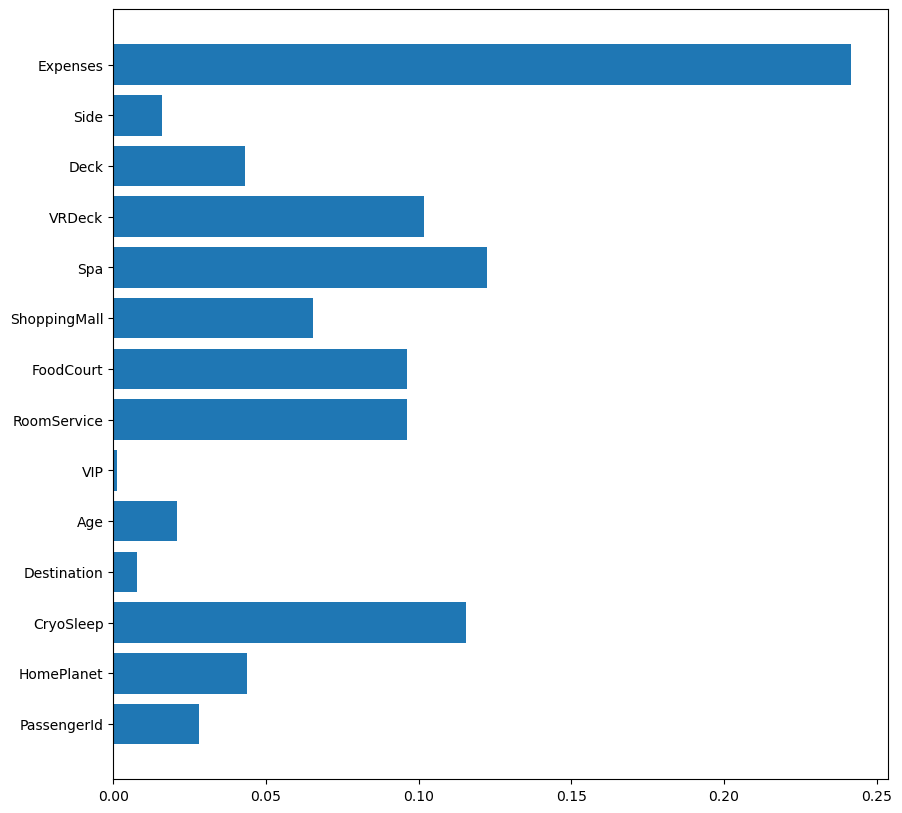

In [494]:
#make a random forest model and give the accuracy score with train test split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('Transported', axis=1)
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
Random_Forest = ('Accuracy score: ', accuracy_score(y_test, y_pred))
print(Random_Forest)
#plot the feature importance
plt.figure(figsize=(10,10))
plt.barh(X.columns, rf.feature_importances_)
plt.show()

### ADA Boost

In [496]:
#make a ada boost model and give the accuracy score with train test split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('Transported', axis=1)
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ada = AdaBoostClassifier(n_estimators=250, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
ADA_Boost = print('Accuracy score: ', accuracy_score(y_test, y_pred))
print(ADA_Boost)

Accuracy score:  0.7841257668711656
None


In [488]:
#show all the accuracy scores
print(KNN)
print(Descision_Tree)
print(Random_Forest)
print(ADA_Boost)


('Accuracy score: ', 0.6529907975460123)
('Accuracy score: ', 0.754601226993865)
('Accuracy score: ', 0.7948619631901841)
('Accuracy score: ', 0.7841257668711656)


### Read in Test Data and train 

In [459]:
#read in the test data
df_test = pd.read_csv("test.csv")

#drop column passengerId name
df_test = df_test.drop(['Name'], axis=1)

#seperate the cabin column into deck and side 
df_test['Deck'] = df_test['Cabin'].str[0]
df_test['Side'] = df_test['Cabin'].str[-1]
#drop the cabin column
df_test = df_test.drop(['Cabin'], axis=1)

#convert all values to numeric
df_test['Destination'] = df_test['Destination'].astype('category')
df_test['Destination'] = df_test['Destination'].cat.codes
df_test['HomePlanet'] = df_test['HomePlanet'].astype('category')
df_test['HomePlanet'] = df_test['HomePlanet'].cat.codes
df_test['CryoSleep'] = df_test['CryoSleep'].astype('category')
df_test['CryoSleep'] = df_test['CryoSleep'].cat.codes
df_test['VIP'] = df_test['VIP'].astype('category')
df_test['VIP'] = df_test['VIP'].cat.codes
df_test['Deck'] = df_test['Deck'].astype('category')
df_test['Deck'] = df_test['Deck'].cat.codes
df_test['Side'] = df_test['Side'].astype('category')
df_test['Side'] = df_test['Side'].cat.codes

#fill the Age column with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_test['Age'] = imputer.fit_transform(df_test[['Age']])
#fill the RoomService coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_test['RoomService'] = imputer.fit_transform(df_test[['RoomService']])
#fill the ShoppingMall coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_test['ShoppingMall'] = imputer.fit_transform(df_test[['ShoppingMall']])
#fill the FoodCourt coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_test['FoodCourt'] = imputer.fit_transform(df_test[['FoodCourt']])
#fill the Spa coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_test['Spa'] = imputer.fit_transform(df_test[['Spa']])
#fill the VRDeck coloumn with a KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_test['VRDeck'] = imputer.fit_transform(df_test[['VRDeck']])

#make a new coloum expenses by adding all the expenses
df_test['Expenses'] = df_test['RoomService'] + df_test['ShoppingMall'] + df_test['FoodCourt'] + df_test['Spa'] + df_test['VRDeck']

#only 2 digits after the decimal point
df_test['Expenses'] = df_test['Expenses'].round(decimals=2)

df_test.sample(10)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,Expenses
95,0214_02,1,0,2,42.0,0,4762.0,20.0,0.0,4.0,41.0,4,1,4827.0
25,0055_01,0,0,2,24.0,0,1784.0,8.0,18.0,18.0,0.0,6,0,1828.0
4023,8763_01,0,0,2,29.0,0,1694.0,3.0,0.0,0.0,80.0,6,0,1777.0
474,0999_01,0,1,1,21.0,0,0.0,0.0,0.0,0.0,0.0,6,0,0.0
3497,7597_06,0,0,2,1.0,0,0.0,0.0,0.0,0.0,0.0,6,0,0.0
2730,6009_02,1,0,2,41.0,0,0.0,1954.0,318.0,2554.0,724.0,1,0,5550.0
1683,3617_01,0,0,2,34.0,0,0.0,461.0,0.0,0.0,424.0,6,1,885.0
1725,3675_01,0,0,2,38.0,0,84.0,0.0,626.0,0.0,0.0,6,1,710.0
1632,3513_03,1,0,0,39.0,1,0.0,3376.0,0.0,2287.0,0.0,1,1,5663.0
401,0843_01,0,1,1,43.0,0,0.0,0.0,0.0,0.0,0.0,6,0,0.0


In [460]:
#make a new Coloumn transported with the predictions of the random forest model
df_test['Transported'] = rf.predict(df_test)
X = df_test.drop(['Transported'], axis=1)
y = df_test['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#show the accuracy of the model with the best parameters
rf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

#make a new csv file with the predictions and the passengerId
df_test[['PassengerId', 'Transported']].to_csv('submission.csv', index=False)



Random Forest Accuracy: 0.9661214953271028
